# Sampling using inverse cdf method.

In [6]:
# author name: @AnandShegde
try:
    import tensorflow_probability.substrates.jax as tfp
except:
    %pip install tensorflow_probability
    import tensorflow_probability.substrates.jax as tfp

tfd = tfp.distributions
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import seaborn

try:
    import probml_utils as pml
except:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import warnings
import os
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

jax.config.update("jax_platform_name", "cpu")

key = jax.random.PRNGKey(2)

In [3]:
pml.latexify(width_scale_factor=1.5)

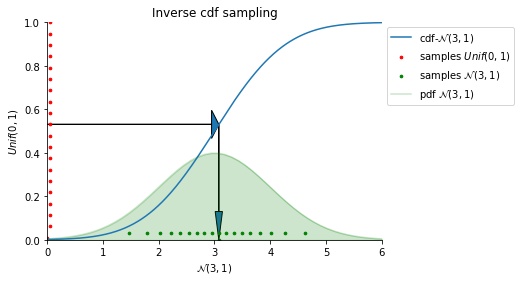

In [5]:
normal = tfd.Normal(3.0, 1.0)
x = jnp.linspace(0, 6, 1000)
plt.plot(x, normal.cdf(x), label=r"cdf-$\mathcal{N}(3,1)$")
uniform = tfd.Uniform()
n = 20

# This is same as sampling n samples from uniform distribution.
uniform_samples = jnp.linspace(0.01, 1, n)

POINT_SIZE = 7

plt.scatter(0, uniform_samples[0], s=POINT_SIZE, c="r", label=r"samples $Unif(0,1)$")
uniform_point = uniform_samples[n // 2]
normal_point = normal.quantile(uniform_point)
plt.scatter(normal_point, 0, s=POINT_SIZE, c="g", label=r"samples $\mathcal{N}(3,1)$")


plt.arrow(0, uniform_point, normal_point, 0, length_includes_head=True, head_width=0.13, head_length=0.13)
plt.arrow(normal_point, uniform_point, 0, -uniform_point, length_includes_head=True, head_length=0.13, head_width=0.13)

plt.scatter(jnp.zeros((n - 1,)) + 0.05, uniform_samples[1:], c="r", s=POINT_SIZE)
plt.scatter(normal.quantile(uniform_samples[1:]), jnp.zeros((n - 1, 1)) + 0.03, c="g", s=POINT_SIZE)

x = jnp.linspace(0, 6)
plt.plot(x, normal.prob(x), alpha=0.2, c="g", label=r"pdf $\mathcal{N}(3,1)$")
plt.fill_between(
    x,
    normal.prob(x),
    jnp.zeros(x.shape[0]),
    alpha=0.2,
    color="g",
)

plt.xlim((0, 6))
plt.ylim(0, 1)
plt.title("Inverse cdf sampling")
plt.xlabel(r"$\mathcal{N}(3,1)$")
plt.ylabel(r"${Unif}(0,1)$")
plt.legend(bbox_to_anchor=(1, 1))
seaborn.despine()

pml.savefig("inverse_cdf_samples")
plt.show()